In [1]:
import numpy as np
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Parameters of the true population
mu_true = 10        # true mean
sigma_true = 2      # true standard deviation
confidence = 0.95   # confidence level
alpha = 1 - confidence

# Sample sizes to simulate
sample_sizes = [5, 10, 20, 40, 80, 160, 1000]

# Number of bootstrap resamples
n_bootstrap = 10000

# Function to compute bootstrap confidence interval
def bootstrap_ci(data, confidence=0.95, n_resamples=10000):
    n = len(data)
    means = []
    for _ in range(n_resamples):
        resample = np.random.choice(data, size=n, replace=True)
        means.append(np.mean(resample))
    lower = np.percentile(means, 100 * (alpha / 2))
    upper = np.percentile(means, 100 * (1 - alpha / 2))
    return lower, upper

# Container to store results
results = []

for n in sample_sizes:
    # Generate a sample from N(10, 2)
    sample = np.random.normal(mu_true, sigma_true, n)
    sample_mean = np.mean(sample)
    sample_sd = np.std(sample, ddof=1)  # unbiased estimator (n-1 in denominator)

    # 1. Analytical Z-interval (population sd assumed known)
    z_crit = stats.norm.ppf(1 - alpha/2)
    se_known = sigma_true / np.sqrt(n)
    ci_z = (sample_mean - z_crit * se_known, sample_mean + z_crit * se_known)

    # 2. Analytical t-interval (population sd unknown, small n)
    t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
    se_unknown = sample_sd / np.sqrt(n)
    ci_t = (sample_mean - t_crit * se_unknown, sample_mean + t_crit * se_unknown)

    # 3. Bootstrap confidence interval
    ci_boot = bootstrap_ci(sample, confidence, n_bootstrap)

    # 4. Bayesian credible interval (using t-distribution posterior)
    #    With noninformative prior, posterior is same as frequentist t CI
    ci_bayes = ci_t

    results.append({
        "n": n,
        "mean": sample_mean,
        "sd": sample_sd,
        "Z_CI": ci_z,
        "t_CI": ci_t,
        "Bootstrap_CI": ci_boot,
        "Bayesian_CI": ci_bayes
    })

# Print results
for r in results:
    print(f"\nn = {r['n']}, mean = {r['mean']:.4f}, sd = {r['sd']:.4f}")
    print(f"  Z CI:        {r['Z_CI']}")
    print(f"  t CI:        {r['t_CI']}")
    print(f"  Bootstrap CI:{r['Bootstrap_CI']}")
    print(f"  Bayesian CI: {r['Bayesian_CI']}")


n = 5, mean = 10.9180, sd = 1.4165
  Z CI:        (np.float64(9.16496086749701), np.float64(12.671051029803335))
  t CI:        (np.float64(9.15923305157548), np.float64(12.676778845724865))
  Bootstrap CI:(np.float64(9.900751520488877), np.float64(12.031405522461434))
  Bayesian CI: (np.float64(9.15923305157548), np.float64(12.676778845724865))

n = 10, mean = 10.3340, sd = 1.4584
  Z CI:        (np.float64(9.094449361905331), np.float64(11.573629491123578))
  t CI:        (np.float64(9.290791538589884), np.float64(11.377287314439025))
  Bootstrap CI:(np.float64(9.5358917022701), np.float64(11.250350232638855))
  Bayesian CI: (np.float64(9.290791538589884), np.float64(11.377287314439025))

n = 20, mean = 10.5122, sd = 1.6051
  Z CI:        (np.float64(9.63572727971144), np.float64(11.388772360864605))
  t CI:        (np.float64(9.761026538129356), np.float64(11.26347310244669))
  Bootstrap CI:(np.float64(9.86323878730902), np.float64(11.236459467375669))
  Bayesian CI: (np.float64(9.


n = 5
  Z CI (avg):        (np.float64(8.248486190889073), np.float64(11.754576353195398))
  t CI (avg):        (np.float64(7.667388864470333), np.float64(12.335673679614137))
  Bootstrap CI (avg):(np.float64(8.553342140519336), np.float64(11.442432455715794))

n = 10
  Z CI (avg):        (np.float64(8.644472542795327), np.float64(11.123652672013572))
  t CI (avg):        (np.float64(8.482100906037905), np.float64(11.286024308770994))
  Bootstrap CI (avg):(np.float64(8.739539472447072), np.float64(11.02458149073744))

n = 20
  Z CI (avg):        (np.float64(9.151872668190522), np.float64(10.904917749343685))
  t CI (avg):        (np.float64(9.101249944935766), np.float64(10.955540472598441))
  Bootstrap CI (avg):(np.float64(9.181519695506935), np.float64(10.870915414769701))

n = 40
  Z CI (avg):        (np.float64(9.366544861628004), np.float64(10.606134926237125))
  t CI (avg):        (np.float64(9.357277473132028), np.float64(10.615402314733101))
  Bootstrap CI (avg):(np.float64(9.

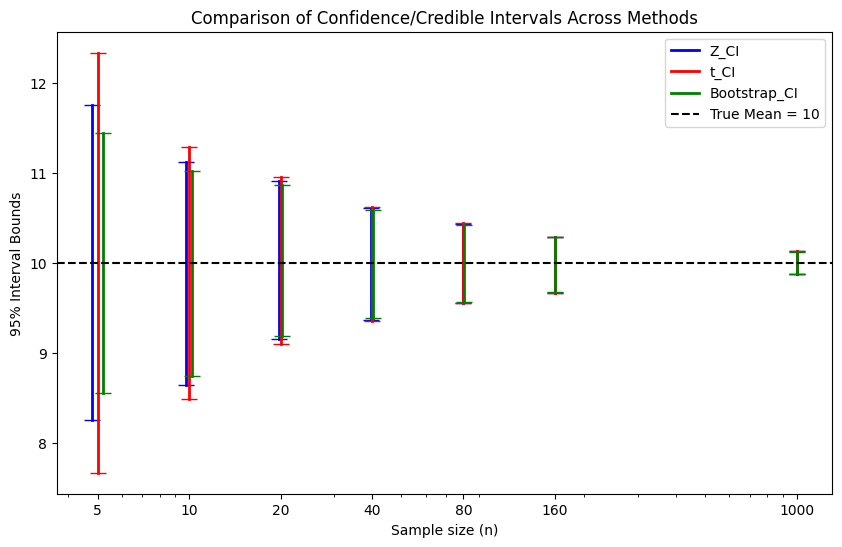

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Population parameters
mu_true = 10
sigma_true = 2
confidence = 0.95
alpha = 1 - confidence

# Sample sizes to simulate
sample_sizes = [5, 10, 20, 40, 80, 160, 1000]
n_bootstrap = 2000
n_reps = 200  # number of repeated simulations per n to stabilize results

def bootstrap_ci(data, confidence=0.95, n_resamples=2000):
    n = len(data)
    means = [np.mean(np.random.choice(data, size=n, replace=True))
             for _ in range(n_resamples)]
    lower = np.percentile(means, 100 * (alpha / 2))
    upper = np.percentile(means, 100 * (1 - alpha / 2))
    return lower, upper

# Store average intervals
avg_results = []

for n in sample_sizes:
    z_cis, t_cis, boot_cis = [], [], []

    for _ in range(n_reps):
        sample = np.random.normal(mu_true, sigma_true, n)
        sample_mean = np.mean(sample)
        sample_sd = np.std(sample, ddof=1)

        # Z-interval (assuming sigma known)
        z_crit = stats.norm.ppf(1 - alpha/2)
        se_known = sigma_true / np.sqrt(n)
        z_cis.append((sample_mean - z_crit * se_known,
                      sample_mean + z_crit * se_known))

        # t-interval (using sample sd)
        t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
        se_unknown = sample_sd / np.sqrt(n)
        t_cis.append((sample_mean - t_crit * se_unknown,
                      sample_mean + t_crit * se_unknown))

        # Bootstrap CI
        boot_cis.append(bootstrap_ci(sample, confidence, n_bootstrap))

    # Average the bounds across reps
    avg_results.append({
        "n": n,
        "Z_CI": (np.mean([ci[0] for ci in z_cis]), np.mean([ci[1] for ci in z_cis])),
        "t_CI": (np.mean([ci[0] for ci in t_cis]), np.mean([ci[1] for ci in t_cis])),
        "Bootstrap_CI": (np.mean([ci[0] for ci in boot_cis]), np.mean([ci[1] for ci in boot_cis])),
    })

# Print average results
for r in avg_results:
    print(f"\nn = {r['n']}")
    print(f"  Z CI (avg):        {r['Z_CI']}")
    print(f"  t CI (avg):        {r['t_CI']}")
    print(f"  Bootstrap CI (avg):{r['Bootstrap_CI']}")

# Plot the data
fig, ax = plt.subplots(figsize=(10,6))

for i, r in enumerate(avg_results):
    n = r["n"]

    # Plot intervals centered at the true mean = 10
    for label, color, offset in zip(["Z_CI","t_CI","Bootstrap_CI"],
                                    ["blue","red","green"],
                                    [-0.2, 0, 0.2]):
        ci = r[label]
        ax.plot([n+offset]*2, ci, color=color, marker="_", markersize=12, lw=2, label=label if i==0 else "")

# Formatting
ax.axhline(mu_true, color="black", linestyle="--", label="True Mean = 10")
ax.set_xscale("log")
ax.set_xticks(sample_sizes)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.set_xlabel("Sample size (n)")
ax.set_ylabel("95% Interval Bounds")
ax.set_title("Comparison of Confidence/Credible Intervals Across Methods")
ax.legend()
plt.show()

As the sample size increases,the confidence intervals get closer and closer to the true mean.


n = 5
  Z CI (avg):        (np.float64(8.248486190889073), np.float64(11.754576353195398))
  t CI (avg):        (np.float64(7.667388864470333), np.float64(12.335673679614137))
  Bootstrap CI (avg):(np.float64(8.553342140519336), np.float64(11.442432455715794))
  Bayesian CI (avg): (np.float64(8.27583172418473), np.float64(11.727135857292469))

n = 10
  Z CI (avg):        (np.float64(8.644472542795327), np.float64(11.123652672013572))
  t CI (avg):        (np.float64(8.482100906037905), np.float64(11.286024308770994))
  Bootstrap CI (avg):(np.float64(8.739539472447072), np.float64(11.02458149073744))
  Bayesian CI (avg): (np.float64(8.656097613153241), np.float64(11.115679173075987))

n = 20
  Z CI (avg):        (np.float64(9.151872668190522), np.float64(10.904917749343685))
  t CI (avg):        (np.float64(9.101249944935766), np.float64(10.955540472598441))
  Bootstrap CI (avg):(np.float64(9.181519695506935), np.float64(10.870915414769701))
  Bayesian CI (avg): (np.float64(9.155132502

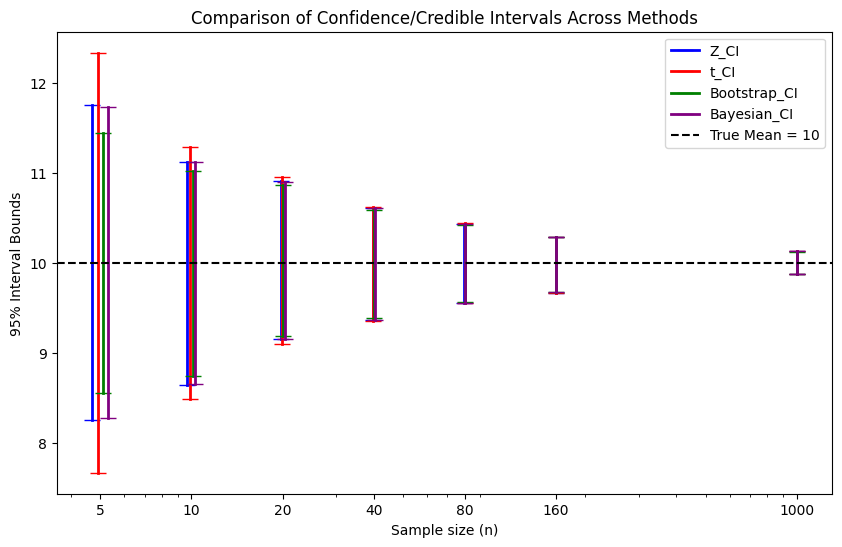

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Population parameters
mu_true = 10
sigma_true = 2
confidence = 0.95
alpha = 1 - confidence

# Prior parameters for Bayesian inference
mu_prior = 10     # prior mean (centered at truth for simplicity)
sigma_prior = 5   # prior std dev (fairly uninformative)

# Sample sizes to simulate
sample_sizes = [5, 10, 20, 40, 80, 160, 1000]
n_bootstrap = 2000
n_reps = 200  # number of repeated simulations per n to stabilize results

def bootstrap_ci(data, confidence=0.95, n_resamples=2000):
    n = len(data)
    means = [np.mean(np.random.choice(data, size=n, replace=True))
             for _ in range(n_resamples)]
    lower = np.percentile(means, 100 * (alpha / 2))
    upper = np.percentile(means, 100 * (1 - alpha / 2))
    return lower, upper

def bayesian_ci(data, sigma, mu_prior=10, sigma_prior=5, confidence=0.95):
    """
    Conjugate Bayesian update for Normal likelihood with Normal prior.
    Returns credible interval for the mean.
    """
    n = len(data)
    sample_mean = np.mean(data)

    # Convert to precision (1/variance) for easy math
    tau_prior = 1 / sigma_prior**2
    tau_likelihood = n / sigma**2

    # Posterior precision and variance
    tau_post = tau_prior + tau_likelihood
    sigma_post = np.sqrt(1 / tau_post)

    # Posterior mean (weighted average of prior and sample mean)
    mu_post = (tau_prior * mu_prior + tau_likelihood * sample_mean) / tau_post

    # Credible interval (Normal posterior)
    z_crit = stats.norm.ppf(1 - (1 - confidence)/2)
    lower = mu_post - z_crit * sigma_post
    upper = mu_post + z_crit * sigma_post

    return lower, upper

# Store average intervals
avg_results = []

for n in sample_sizes:
    z_cis, t_cis, boot_cis, bayes_cis = [], [], [], []

    for _ in range(n_reps):
        sample = np.random.normal(mu_true, sigma_true, n)
        sample_mean = np.mean(sample)
        sample_sd = np.std(sample, ddof=1)

        # Z-interval (assuming sigma known)
        z_crit = stats.norm.ppf(1 - alpha/2)
        se_known = sigma_true / np.sqrt(n)
        z_cis.append((sample_mean - z_crit * se_known,
                      sample_mean + z_crit * se_known))

        # t-interval (using sample sd)
        t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
        se_unknown = sample_sd / np.sqrt(n)
        t_cis.append((sample_mean - t_crit * se_unknown,
                      sample_mean + t_crit * se_unknown))

        # Bootstrap CI
        boot_cis.append(bootstrap_ci(sample, confidence, n_bootstrap))

        # Bayesian CI
        bayes_cis.append(bayesian_ci(sample, sigma_true, mu_prior, sigma_prior, confidence))

    # Average the bounds across reps
    avg_results.append({
        "n": n,
        "Z_CI": (np.mean([ci[0] for ci in z_cis]), np.mean([ci[1] for ci in z_cis])),
        "t_CI": (np.mean([ci[0] for ci in t_cis]), np.mean([ci[1] for ci in t_cis])),
        "Bootstrap_CI": (np.mean([ci[0] for ci in boot_cis]), np.mean([ci[1] for ci in boot_cis])),
        "Bayesian_CI": (np.mean([ci[0] for ci in bayes_cis]), np.mean([ci[1] for ci in bayes_cis])),
    })

# Print average results
for r in avg_results:
    print(f"\nn = {r['n']}")
    print(f"  Z CI (avg):        {r['Z_CI']}")
    print(f"  t CI (avg):        {r['t_CI']}")
    print(f"  Bootstrap CI (avg):{r['Bootstrap_CI']}")
    print(f"  Bayesian CI (avg): {r['Bayesian_CI']}")

# Plot graph
fig, ax = plt.subplots(figsize=(10,6))

for i, r in enumerate(avg_results):
    n = r["n"]

    # Plot intervals centered at the true mean = 10
    for label, color, offset in zip(["Z_CI","t_CI","Bootstrap_CI","Bayesian_CI"],
                                    ["blue","red","green","purple"],
                                    [-0.3, -0.1, 0.1, 0.3]):
        ci = r[label]
        ax.plot([n+offset]*2, ci, color=color, marker="_", markersize=12, lw=2, label=label if i==0 else "")

# Formatting
ax.axhline(mu_true, color="black", linestyle="--", label="True Mean = 10")
ax.set_xscale("log")
ax.set_xticks(sample_sizes)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.set_xlabel("Sample size (n)")
ax.set_ylabel("95% Interval Bounds")
ax.set_title("Comparison of Confidence/Credible Intervals Across Methods")
ax.legend()
plt.show()
